In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

In [ ]:
r_i = np.arange(0,10,.001)
def U(r):
    return (4*(math.pi))*((((2/5)*(1/r)**(10))-(1/r)**4))


C:\Users\evilb\AppData\Local\Temp\ipykernel_21852\3871384200.py:3: RuntimeWarning: divide by zero encountered in divide
  return (4*(math.pi))*((((2/5)*(1/r)**(10))-(1/r)**4))
C:\Users\evilb\AppData\Local\Temp\ipykernel_21852\3871384200.py:3: RuntimeWarning: invalid value encountered in subtract
  return (4*(math.pi))*((((2/5)*(1/r)**(10))-(1/r)**4))


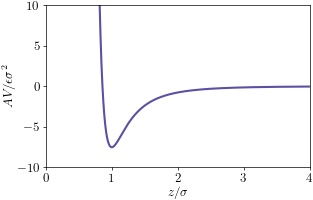

In [ ]:
r_i = np.arange(0,10,.001)
def U(r):
    return (4*(math.pi))*((((2/5)*(1/r)**(10))-(1/r)**4))

plt.plot(r_i,U(r_i))
plt.ylim(-10,10)
plt.xlim(0,4)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$AV/\epsilon\sigma^2$')
plt.title('')
plt.savefig('../figures/LJ_Potential.pdf', format='pdf')
#plt.show()


This next part is for drawing the lattice of the graphene layer

In [2]:
from numpy import append


ua= [[0,0]] #unit cell array
basis = [] #atom positions from basis vectors
a_0 = 1.
a_1 = [(a_0/2)*(3)**(1/2),(a_0/2)*3] #lattice vectors
a_2 = [(a_0/2)*(-1)*(3)**(1/2),(a_0/2)*3]
b_1 = [(a_0/2)*(3)**(1/2),(a_0/2)*1]#basis vectors
b_2 = [0,(a_0)*1]
boundary= (a_0/2)+a_0*6
boundary1 = ((1*a_1[0]-3*a_2[0])**(2)+(1*a_1[1]-3*a_2[1])**2)**(1/2)
for l1 in range(-5,6):
    for l2 in range(-5,6):
       x=[l1*a_1[0]+l2*a_2[0],l1*a_1[1]+l2*a_2[1]]
       x1 = [x[0]+b_1[0],x[1]+b_1[1]]
       x2 = [x[0]+b_2[0],x[1]+b_2[1]]
       if x1[0]>=(-1)*boundary1 and x1[0]<=boundary1 and x1[1]>=(-1)*boundary1 and x1[1]<=boundary1:
            basis.append(x1)
       if x2[0]>=(-1)*boundary1 and x2[0]<=boundary1 and x2[1]>=(-1)*boundary1 and x2[1]<=boundary1:
            basis.append(x2)
       if x[0]>(-1)*boundary and x[0]<boundary and x[1]>(-1)*boundary and x[1]<boundary:
            ua.append(x)
            x1 = []

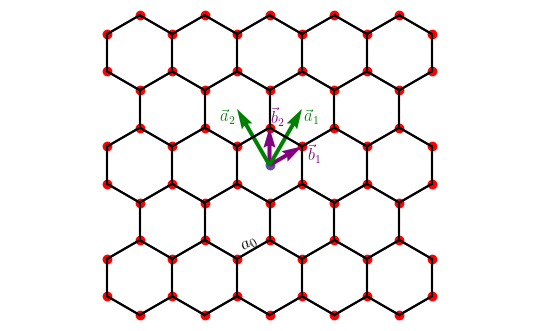

In [3]:
plt.figure(figsize=(3.4646*2, 2.14122*2))
for u in range(0,len(basis)):
    for y in range(0,len(basis)):
        if y!=u:
            D = ((basis[u][0]-basis[y][0])**2+(basis[u][1]-basis[y][1])**2)**(1/2)
            if D <= 1.1:
                plt.plot([basis[u][0],basis[y][0]],[basis[u][1],basis[y][1]],'k-')
for u in range(0,len(basis)):
    plt.scatter(basis[u][0],basis[u][1],color='red',alpha =1)
    
plt.scatter(0,0)
plt.quiver(0,0,0,1,angles='xy', scale_units='xy', scale=1, color='purple')
plt.text(.05, 1.3, r"$\vec{b}_2$", ha='left', va='center', color='purple',fontsize=12)
plt.quiver(0, 0, b_1[0], b_1[1],scale=1,units='xy',color='purple')
plt.text(b_1[0]+.15, b_1[1]-.2, r"$\vec{b}_1$", ha='left', va='center', color='purple',fontsize=12)
plt.quiver(0, 0, a_1[0], a_1[1],scale=1,units='xy',color='green')
plt.text(a_1[0]+.05, a_1[1]-.2, r"$\vec{a}_1$", ha='left', va='center', color='green',fontsize=12)
plt.quiver(0, 0, a_2[0], a_2[1],scale=1,units='xy',color='green')
plt.text(a_2[0]-.05, a_2[1]-.2, r"$\vec{a}_2$", ha='right', va='center', color='green',fontsize=12)
plt.text(-b_1[1]-.35, -2-b_1[1]+.25, r'$a_0$', rotation=30, fontsize=13)
#plt.ylim(-6,6)
plt.axis('equal')
plt.xticks([])  # Remove x-axis tick marks
plt.yticks([])  # Remove y-axis tick marks
#y=3.75
#plt.xlim(-1*y,y)
#plt.ylim(-1*y,y)
#plt.gca().set_aspect('equal', adjustable='box')
#plt.ylabel(r'$\hat{y} (\AA)$')
#plt.title(r'$\delta = 0, \quad a_0 \approx 1.42 \AA$')
#plt.xlabel(r'$\hat{x} (\AA)$')
plt.box(False)
plt.savefig('../figures/Graphen_Lattice.pdf', format='pdf')
plt.show()

In [4]:
from cmath import pi
from numpy import append

how_far = 4
ua= [[0,0]] #unit cell array
a_0 = 1.0
g_1 = [((2*pi)/(3*a_0))*(3**(1/2)),((2*pi)/(3*a_0))*(1)] #lattice vectors
g_2 = [((2*pi)/(3*a_0))*(3**(1/2))*(-1),(((2*pi)/(3*a_0)))*(1)]
##b_2 = [0,(a_0)*1]
boundary= (g_1[0]**2+g_1[1]**2)**(1/2)
#boundary1 = ((3*a_1[0]-3*a_2[0])**(2)+(3*a_1[1]-3*a_2[1])**2)**(1/2)
for l1 in range(-10,10):
    for l2 in range(-10,10):
       x=[l1*g_1[0]-l2*g_2[0],l1*g_1[1]-l2*g_2[1]]
       #x1 = [x[0]+b_1[0],x[1]+b_1[1]]
       #2 = [x[0]+b_2[0],x[1]+b_2[1]]
       #if x1[0]>=(-1)*boundary1 and x1[0]<=boundary1 and x1[1]>=(-1)*boundary1 and x1[1]<=boundary1:
        #    basis.append(x1)
       #if x2[0]>=(-1)*boundary1 and x2[0]<=boundary1 and x2[1]>=(-1)*boundary1 and x2[1]<=boundary1:
        #    basis.append(x2)
       if (x[0]**2 + x[1]**2)<boundary*70:
          ua.append(x)
#            x1 = []

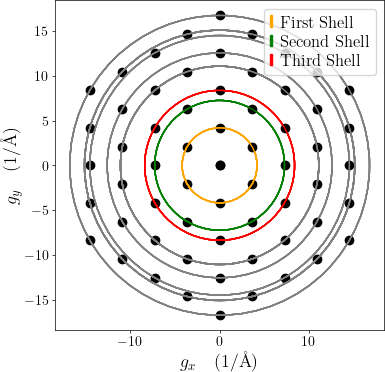

In [5]:
from matplotlib.patches import Circle, Patch
colors = ['orange', 'green', 'red']
labels = ['First Shell', 'Second Shell', 'Third Shell']
# Create a list of Patch objects for the legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.figure(figsize=(3.4646*2, 2.14122*2))
ax = plt.gca()

for u in range(len(ua)):
    color = colors[u % len(colors)]  # Cycle through colors using modulo operator
    label = labels[u % len(labels)]  # Cycle through labels using modulo operator

    ax.scatter(ua[u][0], ua[u][1], color='black')
    D = ((ua[u][0] - ua[0][0]) ** 2 + (ua[u][1] - ua[0][1]) ** 2) ** (1 / 2)
    if D == 11.082497176088108:
        circle = Circle((0, 0), D, fill=False,color = 'grey')
        ax.add_patch(circle)
    elif D == 8.377580409572781:
        circle = Circle((0, 0), D, fill=False, color = 'red')
        ax.add_patch(circle)
    elif D == 7.2551974569368705:
        circle = Circle((0, 0), D, fill=False, color = 'green')
        ax.add_patch(circle)
    elif D< 11.082497176088108:
        circle = Circle((0, 0), D, fill=False, color = 'orange')
        ax.add_patch(circle)
    else:
        circle = Circle((0, 0), D, fill=False, color = 'grey')
        ax.add_patch(circle)
plt.legend(handles=legend_patches)
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y limits

#plt.axis('equal')
plt.xlabel(r'$ g_x \quad {({1/\textrm{\AA}})}$')
#plt.ylim(-15,15)
plt.ylabel(r'$ g_y \quad {({1/\textrm{\AA}})}$')
plt.title('')
#plt.legend()  # Add legend to the plot
plt.savefig('../figures/Reciprocal.pdf', format='pdf')
plt.show()

In [6]:
from scipy.special import kv
from math import e
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy


In [7]:
from cmath import nan
from cmath import pi
import cmath
from numpy import append

epsilon = 16.96834641666561 #kelvin
sigma = 2.641746709672484 #angstrom
a_0 = 1.42
g1 = [((2*pi)/(3*a_0))*(3**(1/2)),((2*pi)/(3*a_0))*(1),0] #lattice vectors
g2 = [((2*pi)/(3*a_0))*(3**(1/2))*(-1),(((2*pi)/(3*a_0)))*(1),0]
b1 = [(a_0/2)*(3)**(1/2),(a_0/2)*1,0]#basis vectors
b2 = [0,(a_0)*1,0]
def magnitude(vector):
    return math.sqrt(sum(pow(element,2) for element in vector))
A = (3*(3)**(1/2)*a_0**2)/2
G0 = [[0,0]]
G1 = [[0,1],[1,0],[1,1],[.0000001,.0000001]]
G2 = [[1,2],[2,1],[-1,1],[0,1],[1,0],[1,1],[.0000001,.0000001]]
G3 = [[2,2],[2,0],[0,2],[1,2],[2,1],[-1,1],[0,1],[1,0],[1,1],[.0000001,.0000001]]
G4 =[[3,2],[3,1],[2,-1],[2,3],[1,3],[-1,2],[2,2],[2,0],[0,2],[1,2],[2,1],[-1,1],[0,1],[1,0],[1,1],[.0000001,.0000001]]
def V(x,y,z,g):
    if g ==0:
        L=G0
    elif g==1:
        L=G1
    elif g==2:
        L=G2
    elif g==3:
        L=G3
    else:
        L=G4
    num =0
    num1 = ((2/5)*(sigma/z)**(10)-(sigma/z)**4)
    num2 =0
    for l1 in range(0,len(L)-1):
        gz = [L[l1][0]*g1[0]+L[l1][1]*g2[0],L[l1][0]*g1[1]+L[l1][1]*g2[1],0]
        #print(magnitude(gz))
        for fg in [[0,1],[1,0]]:
            l3 = fg[1]
            l4 = fg[0]
            #for l4 in [1,0]:
            #num2 = 2*(math.cos(np.dot(gz,([l3*b1[0]+l4*b2[0]+x,l3*b1[1]+l4*b2[1]+y,0]))))
            #fg=[]
            #fg.append([l3,l4])
            #print(fg)
            #print(l3)                    #print(l4)
            num2 = 2*(math.cos(np.dot(gz,[x+l3*b1[0]+l4*b2[0],y+l3*b1[1]+l4*b2[1],0])))*((1/60)*(((magnitude(gz)*sigma**2)/(2*z))**5)*kv(5,magnitude(gz)*z)-(((magnitude(gz)*sigma**2)/(2*z))**2)*kv(2,magnitude(gz)*z))
            #num2 = cmath.exp(1j*np.dot(gz,([x+(l3*b1[0]+l4*b2[0]),y+(l3*b1[1]+l4*b2[1]),0])))*((1/60)*(((magnitude(gz)*sigma**2)/(2*z))**5)*kv(5,magnitude(gz)*z)-(((magnitude(gz)*sigma**2)/(2*z))**2)*kv(2,magnitude(gz)*z))
            num1+=num2
    num = (epsilon*(sigma**2)*(4*pi/A))*num1
    return num

#print(kv(5,5.109*2.5))
#print(kv(5,2.949*2.5))
print(V(0,1,2.5,0))
print(pi)


-156.93594651539775
3.141592653589793


In [8]:
r_i = np.arange(2.4,2.6,.0001)
vng_2=[]
vng_1=[]
vng_3=[]
vng_4=[]
ng1min=0
ng2min=0
ng3min=0
ng4min=0
for i in r_i:
    vng_1.append([i,V(0,0,i,1)])
    vng_2.append([i,V(0,0,i,2)])
    vng_3.append([i,V(0,0,i,3)])
    vng_4.append([i,V(0,0,i,4)])
for i in range(0,len(vng_1)-1):
    if vng_1[i][1]>vng_1[i+1][1]:
        ng1min=vng_1[i][0]
    if vng_2[i][1]>vng_2[i+1][1]:
        ng2min=vng_2[i][0]
    if vng_3[i][1]>vng_3[i+1][1]:
        ng3min=vng_3[i][0]
    if vng_4[i][1]>vng_4[i+1][1]:
        ng4min=vng_4[i][0]

print(ng1min,':', ng2min, ':', ng3min, ':', ng4min)

2.5075000000002268 : 2.524700000000263 : 2.5226000000002586 : 2.5225000000002584


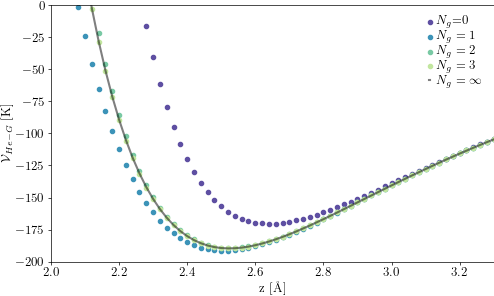

In [9]:
from graphenetools import gt
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
angstrom = '\u00c5'
Ng = 'N\u2093g'
r_i = np.arange(2,6,.02)
_, _, V_array = gt.plot_V1D(0,0,r_i,strains=0,dpi=300)
plt.close()  # Close the plot without displaying it
plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))
#fig = plt.figure()
def U(r):
    return (epsilon*(sigma**2)*4*(pi)/A)*((((2/5)*(sigma/r)**(10))-(sigma/r)**4))
plt.scatter(r_i,V(0,0,r_i,0),label=r'$N_g$=0', marker ='.')
plt.scatter(r_i, V(0,0,r_i,1),label=r'$N_g=1$', marker = '.')
plt.scatter(r_i,V(0,0,r_i,2),label =r'$N_g=2$', marker ='.')
plt.scatter(r_i,V(0,0,r_i,3),label =r'$N_g=3$', marker ='.')
plt.plot(r_i,V_array[0],label=r"$N_g=\infty$",color = "black",alpha=0.5)
plt.ylim(-200,0)
plt.xlim(2,3.3)
plt.xlabel('z ['+angstrom+']')
plt.ylabel(r'$\mathcal{V}_{He-G}$ [K]')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/Potential_Z_Thesis_2.pdf', format='pdf')
plt.show()


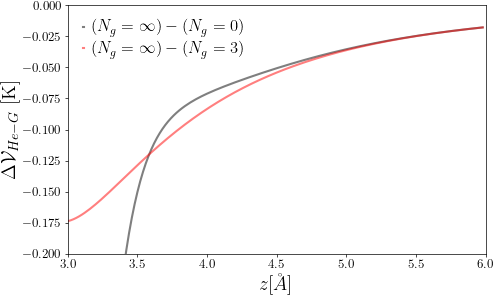

In [10]:
from graphenetools import gt
angstrom = '\u00c5'
Ng = 'N\u2093g'
r_i = np.arange(2,6,.02)
_, _, V_array = gt.plot_V1D(0,0,r_i,strains=0,dpi=300)
plt.close()  # Close the plot without displaying it
plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))

def U(r):
    return (epsilon*(sigma**2)*4*(pi)/A)*((((2/5)*(sigma/r)**(10))-(sigma/r)**4))

plt.plot(r_i,V_array[0]-V(0,0,r_i,0),label=r"$(N_g = \infty)-(N_g=0)$",color = "black",alpha=0.5)
plt.plot(r_i,V_array[0]-V(0,0,r_i,3),label=r"$(N_g = \infty)-(N_g=3)$",color = "red",alpha=0.5)
plt.ylim(-0.2,0)
plt.xlim(3,6)
plt.xlabel(r'$z {[\AA]}$',fontsize=14)
plt.ylabel(r'$\Delta\mathcal{V}_{He-G}$ [K]',fontsize=14)
#plt.title(r'Potentials in $\hat{z}$')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/Diff_Full_review.pdf', format='pdf')
plt.show()

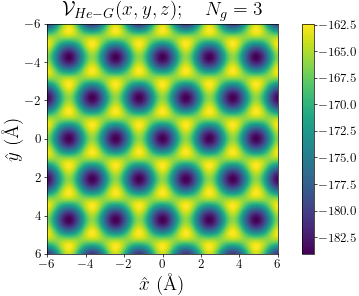

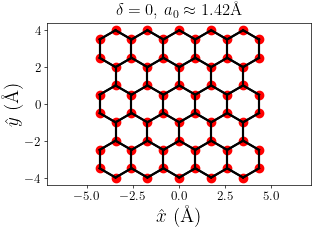

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
space = 101
angstrom = '\u00c5'
r_x = r_y = np.linspace(-6,6,space)
plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))

def f(x,y):
    return np.array([V(i,j,sigma,3) for j in y for i in x]).reshape(space, space)   
z=f(r_x,r_y)
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
plt.imshow(z, extent = [-6,6,6,-6] ,interpolation='bessel', origin ='lower')
plt.colorbar()
plt.title(r'$\mathcal{V}_{He-G}(x,y,z) ; \quad N_g=3$',fontsize=14)
plt.xlabel(r'$\hat{x}$ ('+angstrom+')',fontsize=14)
plt.ylabel(r'$\hat{y}$ ('+angstrom+')',fontsize=14)
plt.tight_layout()
plt.savefig('../figures/3_shell_potential_Thesis.pdf', format='pdf')

plt.show()
for u in range(0,len(basis)):
    plt.scatter(basis[u][0],basis[u][1],color='red')
    for y in range(0,len(basis)):
        if y!=u:
            D = ((basis[u][0]-basis[y][0])**2+(basis[u][1]-basis[y][1])**2)**(1/2)
            if D <= 1.1:
                plt.plot([basis[u][0],basis[y][0]],[basis[u][1],basis[y][1]],'k-')
#plt.ylim(-3.5,3.5)

#plt.xlim(-3.5,3.5)
plt.axis('equal')
plt.title(r'$\delta = 0$, $a_0 \approx 1.42$'+angstrom,fontsize=12)
plt.xlabel(r'$\hat{x}$ ('+angstrom+')',fontsize=14)
plt.ylabel(r'$\hat{y}$ ('+angstrom+')',fontsize=14)
plt.show()


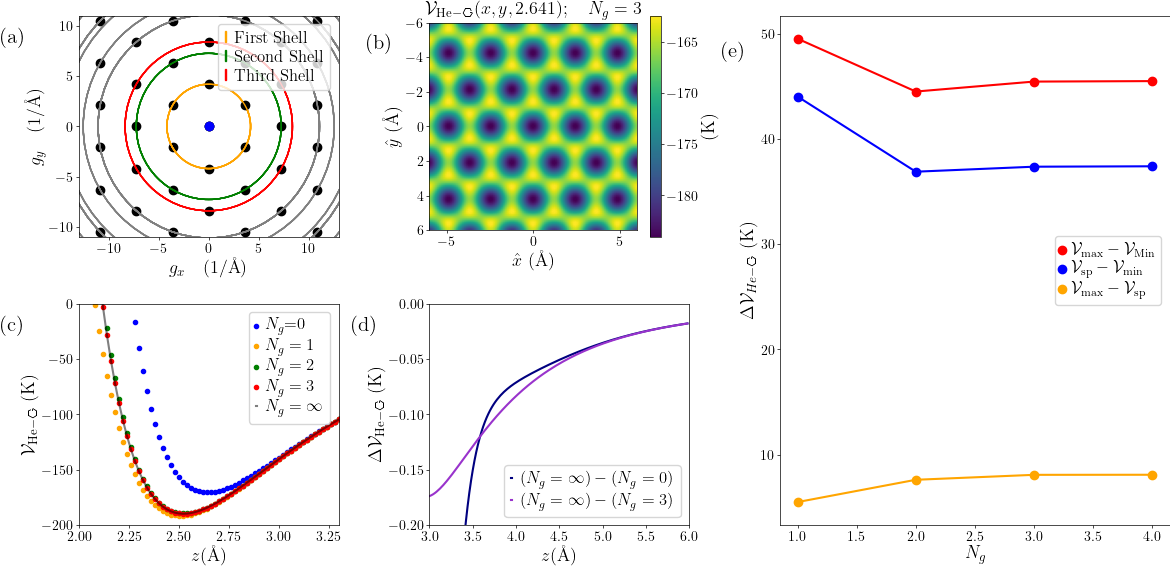

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{SVRsymbols}
"""
fig = plt.figure(figsize=((12, 6)))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 2, 3], height_ratios=[1, 1])
blue_color = (0, 0, 1)          
black_color = (0, 0, 0)       
orange_color = (1, 0.647, 0)    
red_color = (1, 0, 0)           
green_color = (0, .5, 0)        
dark_orange_color = (0.6, 0.2, 0.8)
darker_blue_color = (0, 0, 0.5)
darker_red_color = (0.6, 0.2, 0.8)        
#----------------------------------
ax_main = plt.subplot(gs[:, 2])
ng=1
ax_main.scatter(ng,abs(V(0,0,ng1min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng)), color = red_color)
ax_main.scatter(ng,abs(V(0,0,ng1min,ng)-V(a_0*(3)**(1/2)/2,0,ng1min,ng)), color =blue_color)
ax_main.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng)-V(a_0*(3)**(1/2)/2,0,ng1min,ng)), color =orange_color)
ng=2
ax_main.scatter(ng,abs(V(0,0,ng2min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng2min,ng)), color = red_color)
ax_main.scatter(ng,abs(V(0,0,ng2min,ng)-V(a_0*(3)**(1/2)/2,0,ng2min,ng)), color =blue_color)
ax_main.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng2min,ng)-V(a_0*(3)**(1/2)/2,0,ng2min,ng)), color =orange_color)
ng=3
ax_main.scatter(ng,abs(V(0,0,ng3min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng3min,ng)), color = red_color)
ax_main.scatter(ng,abs(V(0,0,ng3min,ng)-V(a_0*(3)**(1/2)/2,0,ng3min,ng)), color =blue_color)
ax_main.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng3min,ng)-V(a_0*(3)**(1/2)/2,0,ng3min,ng)), color =orange_color)
ng=4
ax_main.scatter(ng,abs(V(0,0,ng4min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng4min,ng)), color = red_color)
ax_main.scatter(ng,abs(V(0,0,ng4min,ng)-V(a_0*(3)**(1/2)/2,0,ng4min,ng)), color =blue_color)
ax_main.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng4min,ng)-V(a_0*(3)**(1/2)/2,0,ng4min,ng)), color =orange_color)
mins =[ng1min,ng2min,ng3min,ng4min]
Vmin =[]
Vmax=[]
Vsad=[]
for i in range(0,len(mins)):
    Vmin.append(abs(V(0,0,mins[i],i+1)-V(a_0*(3)**(1/2)/2,a_0/2,mins[i],i+1)))
    Vmax.append(abs(V(0,0,mins[i],i+1)-V(a_0*(3)**(1/2)/2,0,mins[i],i+1)))
    Vsad.append(abs(V(a_0*(3)**(1/2)/2,a_0/2,mins[i],i+1)-V(a_0*(3)**(1/2)/2,0,mins[i],i+1)))
ax_main.plot([1,2,3,4],Vmin,color =red_color)
ax_main.plot([1,2,3,4],Vmax,color =blue_color)
ax_main.plot([1,2,3,4],Vsad,color =orange_color)


ax_main.legend([r'$\mathcal{V}_{\rm{max}}-\mathcal{V}_{\rm{Min}}$',r'$\mathcal{V}_{\rm{sp}}-\mathcal{V}_{\rm{min}}$',r'$\mathcal{V}_{\rm{max}}-\mathcal{V}_{\rm{sp}}$'])
ax_main.set_xlabel(r'$N_g$')
ax_main.set_ylabel(r'$\Delta\mathcal{V}_{He-\graphene}$ (K)')
#ax_main.set_title("Energy Differences & Shell Inclusions")
#----------------------------------
ax_corner1 = plt.subplot(gs[1, 0])
ax_corner1.scatter(r_i,V(0,0,r_i,0),label=r'$N_g$=0', marker ='.',color=blue_color)
ax_corner1.scatter(r_i, V(0,0,r_i,1),label=r'$N_g=1$', marker = '.',color=orange_color)
ax_corner1.scatter(r_i,V(0,0,r_i,2),label =r'$N_g=2$', marker ='.',color = green_color)
ax_corner1.scatter(r_i,V(0,0,r_i,3),label =r'$N_g=3$', marker ='.',color= red_color)
ax_corner1.plot(r_i,V_array[0],label=r"$N_g=\infty$",color = black_color,alpha=0.5)
# plt.plot(r_i,V_array[0]-V(0,0,r_i,0),label=r"$(N_g = \infty)-(N_g=0)$",color = "black",alpha=0.5)
# plt.plot(r_i,V_array[0]-V(0,0,r_i,3),label=r"$(N_g = \infty)-(N_g=3)$",color = "red",alpha=0.5)
ax_corner1.set_ylim(-200,0)
ax_corner1.set_xlim(2,3.3)
ax_corner1.set_xlabel(r'$z { (\textrm{\AA})}$')
ax_corner1.set_ylabel(r'$\mathcal{V}_{\rm{He-\graphene}}$ (K)')
#plt.title(r'Potentials in $\hat{z}$')
#--------------------------------------
ax_zoom1 = plt.subplot(gs[0, 0])
colors = ['orange', 'green', 'red']
labels = ['First Shell', 'Second Shell', 'Third Shell']

# Create a list of Patch objects for the legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

ax = plt.gca()

for u in range(len(ua)):
    color = colors[u % len(colors)]  # Cycle through colors using modulo operator
    label = labels[u % len(labels)]  # Cycle through labels using modulo operator
    ax.scatter(ua[u][0], ua[u][1], color=black_color)
    D = ((ua[u][0] - ua[0][0]) ** 2 + (ua[u][1] - ua[0][1]) ** 2) ** (1 / 2)
    if D == 11.082497176088108:
        circle = Circle((0, 0), D, fill=False,color = 'grey')
        ax.add_patch(circle)
    elif D == 8.377580409572781:
        circle = Circle((0, 0), D, fill=False, color = red_color)
        ax.add_patch(circle)
    elif D == 7.2551974569368705:
        circle = Circle((0, 0), D, fill=False, color = green_color)
        ax.add_patch(circle)
    elif D< 11.082497176088108:
        circle = Circle((0, 0), D, fill=False, color = orange_color)
        ax.add_patch(circle)
    else:
        circle = Circle((0, 0), D, fill=False, color = 'grey')
        ax.add_patch(circle)
ax.scatter(ua[0][0], ua[0][1], color=blue_color)
ax_zoom1.legend(handles=legend_patches,loc='upper right')
#ax_zoom1.set_aspect('equal', adjustable='box')
# Set x and y limits
ax_zoom1.set_xlim(-13, 13)
ax_zoom1.set_ylim(-11, 11)
ax_zoom1.set_xlabel(r'$ g_x \quad {({1/\textrm{\AA}})}$')
ax_zoom1.set_ylabel(r'$ g_y \quad {({1/\textrm{\AA}})}$')
ax_zoom1.set_title('')
#-------------------------------------
ax_corner2 = plt.subplot(gs[0, 1])
space = 101
angstrom = '\u00c5'
r_x = r_y = np.linspace(-6,6,space)

def f(x,y):
    return np.array([V(i,j,sigma,3) for j in y for i in x]).reshape(space, space)   
z=f(r_x,r_y)
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
im = ax_corner2.imshow(z, extent=[-6, 6, 6, -6], interpolation='bessel', origin='lower')
cbar = plt.colorbar(im, ax=ax_corner2)
cbar.set_label('(K)')
ax_corner2.set_title(r'$\mathcal{V}_{\rm{He-\graphene}}(x,y,2.641) ; \quad N_g=3$',size = 13)
ax_corner2.set_xlabel(r'$\hat{x}$ ('+angstrom+')')
ax_corner2.set_ylabel(r'$\hat{y}$ ('+angstrom+')')
#-------------------------------------
ax_zoom2 = plt.subplot(gs[1, 1])
ax_zoom2.plot(r_i,V_array[0]-V(0,0,r_i,0),label=r"$(N_g = \infty)-(N_g=0)$",color = darker_blue_color)
ax_zoom2.plot(r_i,V_array[0]-V(0,0,r_i,3),label=r"$(N_g = \infty)-(N_g=3)$",color = dark_orange_color)
ax_zoom2.set_ylim(-0.2,0)
ax_zoom2.set_xlim(3,6)
ax_zoom2.set_xlabel(r'$z { (\textrm{\AA})}$')
ax_zoom2.set_ylabel(r'$\Delta\mathcal{V}_{\rm{He-\graphene}}$ (K)')
#plt.title(r'Potentials in $\hat{z}$')
ax_zoom2.legend()
#=========================
ax_corner1.legend(loc='upper right')
#ax_corner2.legend(loc='lower right',prop={'size': 9})
#ax_zoom1.legend(loc='upper right',prop={'size': 11})
#ax_zoom2.legend(loc='lower right',prop={'size': 9})
panel_labels = ['(c)', '(b)', '(a)', '(d)', '(e)']
i=0
label_x_shift = [-0.3, -0.3, -0.3, -0.3, -0.15]  # Adjust this value as needed
for i, ax in enumerate([ax_corner1, ax_corner2, ax_zoom1, ax_zoom2, ax_main]):
    ax.text(label_x_shift[i], 0.95, panel_labels[i], transform=ax.transAxes,
            fontsize=15, va='top', ha='left')


plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots
#plt.subplots_adjust(hspace=.4, wspace=.4)

# Display the figure
plt.savefig(r'../figures/Fig2.pdf', format='pdf')
plt.savefig(r'../figures/Fig2.svg', format='svg')

plt.show()

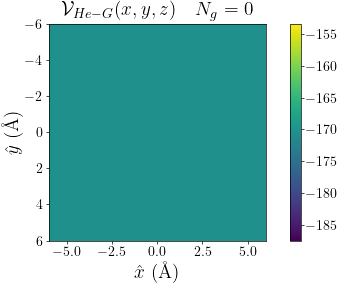

In [15]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
angstrom = '\u00c5'
import matplotlib.pyplot as plt
plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))
space = 101
r_x = r_y = np.linspace(-6,6,space)

def f(x,y):
    return np.array([V(i,j,sigma,0) for j in y for i in x]).reshape(space, space)   
z=f(r_x,r_y)
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
plt.imshow(z, extent = [-6,6,6,-6] ,interpolation='bessel', origin ='lower')
plt.colorbar()
plt.title(r'$\mathcal{V}_{He-G}(x,y,z)  \quad N_g=0$', fontsize=14)
plt.xlabel(r'$\hat{x}$ ('+angstrom+')',fontsize=14)
plt.ylabel(r'$\hat{y}$ ('+angstrom+')',fontsize=14)
plt.tight_layout()
plt.savefig('../figures/Smooth_Potential_Thesis.pdf', format='pdf')
plt.show()

In [16]:
r_i = np.arange(2.4,2.6,.0001)
vng_2=[]
vng_1=[]
vng_3=[]
vng_4=[]
ng1min=0
ng2min=0
ng3min=0
ng4min=0
for i in r_i:
    vng_1.append([i,V(0,0,i,1)])
    vng_2.append([i,V(0,0,i,2)])
    vng_3.append([i,V(0,0,i,3)])
    vng_4.append([i,V(0,0,i,4)])
for i in range(0,len(vng_1)-1):
    if vng_1[i][1]>vng_1[i+1][1]:
        ng1min=vng_1[i][0]
    if vng_2[i][1]>vng_2[i+1][1]:
        ng2min=vng_2[i][0]
    if vng_3[i][1]>vng_3[i+1][1]:
        ng3min=vng_3[i][0]
    if vng_4[i][1]>vng_4[i+1][1]:
        ng4min=vng_4[i][0]

print(ng1min,':', ng2min, ':', ng3min, ':', ng4min)


2.5075000000002268 : 2.524700000000263 : 2.5226000000002586 : 2.5225000000002584


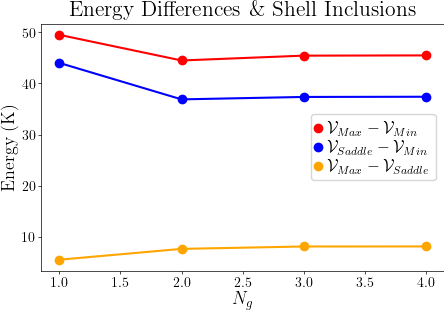

In [17]:
'''VMinMax=[]
VMinSad=[]
VMaxSad=[]
for ng in range(0,2):
    VMinMax.append(V(0,0,2.5,ng)-V(a_0*(3)**(1/2)/2,a_0/2,2.5,ng))
    VMinSad.append(V(0,0,2.5,ng)-V(a_0*(3)**(1/2)/2,0,2.5,ng))
    VMaxSad.append(V(a_0*(3)**(1/2)/2,a_0/2,2.5,ng)-V(a_0*(3)**(1/2)/2,0,2.5,ng))'''
'''ng=0
plt.scatter(ng,abs(V(0,0,sigma,ng)-V(a_0*(3)**(1/2)/2,a_0/2,sigma,ng)), color = 'red')
plt.scatter(ng,abs(V(0,0,sigma,ng)-V(a_0*(3)**(1/2)/2,0,sigma,ng)), color ='blue')
plt.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,sigma,ng)-V(a_0*(3)**(1/2)/2,0,sigma,ng)), color ='orange')'''
plt.figure(figsize=(3.4646*1.5, 2.14122*1.5))
ng=1
plt.scatter(ng,abs(V(0,0,ng1min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng)), color = 'red')
plt.scatter(ng,abs(V(0,0,ng1min,ng)-V(a_0*(3)**(1/2)/2,0,ng1min,ng)), color ='blue')
plt.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng)-V(a_0*(3)**(1/2)/2,0,ng1min,ng)), color ='orange')
ng=2
plt.scatter(ng,abs(V(0,0,ng2min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng2min,ng)), color = 'red')
plt.scatter(ng,abs(V(0,0,ng2min,ng)-V(a_0*(3)**(1/2)/2,0,ng2min,ng)), color ='blue')
plt.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng2min,ng)-V(a_0*(3)**(1/2)/2,0,ng2min,ng)), color ='orange')
ng=3
plt.scatter(ng,abs(V(0,0,ng3min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng3min,ng)), color = 'red')
plt.scatter(ng,abs(V(0,0,ng3min,ng)-V(a_0*(3)**(1/2)/2,0,ng3min,ng)), color ='blue')
plt.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng3min,ng)-V(a_0*(3)**(1/2)/2,0,ng3min,ng)), color ='orange')
ng=4
plt.scatter(ng,abs(V(0,0,ng4min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng4min,ng)), color = 'red')
plt.scatter(ng,abs(V(0,0,ng4min,ng)-V(a_0*(3)**(1/2)/2,0,ng4min,ng)), color ='blue')
plt.scatter(ng,abs(V(a_0*(3)**(1/2)/2,a_0/2,ng4min,ng)-V(a_0*(3)**(1/2)/2,0,ng4min,ng)), color ='orange')
mins =[ng1min,ng2min,ng3min,ng4min]
Vmin =[]
Vmax=[]
Vsad=[]
for i in range(0,len(mins)):
    Vmin.append(abs(V(0,0,mins[i],i+1)-V(a_0*(3)**(1/2)/2,a_0/2,mins[i],i+1)))
    Vmax.append(abs(V(0,0,mins[i],i+1)-V(a_0*(3)**(1/2)/2,0,mins[i],i+1)))
    Vsad.append(abs(V(a_0*(3)**(1/2)/2,a_0/2,mins[i],i+1)-V(a_0*(3)**(1/2)/2,0,mins[i],i+1)))
plt.plot([1,2,3,4],Vmin,color ='red')
plt.plot([1,2,3,4],Vmax,color ='blue')
plt.plot([1,2,3,4],Vsad,color ='orange')


plt.legend([r'$\mathcal{V}_{Max}-\mathcal{V}_{Min}$',r'$\mathcal{V}_{Saddle}-\mathcal{V}_{Min}$',r'$\mathcal{V}_{Max}-\mathcal{V}_{Saddle}$'])
plt.xlabel(r'$N_g$')
plt.ylabel('Energy (K)')
plt.title('Energy Differences \& Shell Inclusions')
plt.savefig('../figures/Energy_Diff_Thesis.pdf', format='pdf')
plt.show()

In [18]:
from graphenetools import gt
gta1=[]
gta2=[]
gt1 =2.9498522568918246
gt2=8.10929398375836
for i in r_i:
    gta1.append(gt.V_64(0, sigma, epsilon, 0, 0, i, carbon_carbon_distance=1.42, poisson_ratio=.165, k_max=gt1, potential="V"))
    gta2.append(gt.V_64(0, sigma, epsilon, 0, 0, i, carbon_carbon_distance=1.42, poisson_ratio=.165, k_max=gt2, potential="V"))

: 

In [ ]:
'''plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['figure.figsize'] = (3.4039*2, 2.10373*2)
strain = 0.00
n=2 # `(2n)^2` C1/3 adsorption sites
fig, ax = gt.roughly_square_plot(n,strain)
gt.roughly_square(n,strain) #print out the relevant PIMC parameters
#fig = plt.figure(figsize=(3.4039*1.5, 2.10373*1.5))
fig.set_dpi(300)
ax.set_ylabel(r"y ($\AA$)")
ax.set_xlabel(r"x ($\AA$)")
plt.savefig(r'../figures/Fig1.pdf', format='pdf')
plt.savefig(r'../figures/Fig1.svg', format='svg')
plt.show()'''

'plt.rcParams.update(plt.rcParamsDefault)\nplt.rcParams[\'axes.labelsize\'] = 9\nplt.rcParams[\'figure.figsize\'] = (3.4039*2, 2.10373*2)\nstrain = 0.00\nn=2 # `(2n)^2` C1/3 adsorption sites\nfig, ax = gt.roughly_square_plot(n,strain)\ngt.roughly_square(n,strain) #print out the relevant PIMC parameters\n#fig = plt.figure(figsize=(3.4039*1.5, 2.10373*1.5))\nfig.set_dpi(300)\nax.set_ylabel(r"y ($\\AA$)")\nax.set_xlabel(r"x ($\\AA$)")\nplt.savefig(r\'../figures/Fig1.pdf\', format=\'pdf\')\nplt.savefig(r\'../figures/Fig1.svg\', format=\'svg\')\nplt.show()'

In [ ]:
print(r_i[20])
print(gta1[20])
print(gta2[20])
V(0,0,2.1999999999,1)

2.402000000000004
-185.12168354226787
-179.8933817538293


-112.19050281712173

In [ ]:
ng =1
print(abs(V(0,0,ng1min,ng)-V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng)))
print(V(0,0,ng1min,ng))
print(V(a_0*(3)**(1/2)/2,a_0/2,ng1min,ng))

49.50954054271705
-191.5444463020673
-142.03490575935027


In [ ]:
gt.V_64(0, sigma, epsilon, 0, 0, i, carbon_carbon_distance=1.42, poisson_ratio=.165, k_max=0, potential="V")

-188.10895409610748

--strain=0.0 --lj_sigma=2.641746709672484 --lj_epsilon=16.96834641666561

In [ ]:
print(V(0,0,2.5,0))
gt.V_64(0, 2.641746709672484, 16.96834641666561, 0, 0, 2.500000, carbon_carbon_distance=1.42, poisson_ratio=.165, k_max=0, potential="V")

-156.93594651539775


-191.5163132134594

area_lattice: 5.238760872572826
epsilon: 16.968346416665611
sigma: 2.641746709672484
pi: 3.141592653589793


what I used:
--strain=0.0 --lj_sigma=2.641746709672484 --lj_epsilon=16.96834641666561 area: 5.2387608725728265
3.141592653589793

In [ ]:
r_i = np.arange(2.4,2.6,.0001)
vng_2=[]
vng_1=[]
vng_3=[]
vng_4=[]
ng1min=0
ng2min=0
ng3min=0
ng4min=0
for i in r_i:
    vng_1.append([i,V(0,0,i,1)])
    vng_2.append([i,V(0,0,i,2)])
    vng_3.append([i,V(0,0,i,3)])
    vng_4.append([i,V(0,0,i,4)])
for i in range(0,len(vng_1)-1):
    if vng_1[i][1]>vng_1[i+1][1]:
        ng1min=vng_1[i][0]
    if vng_2[i][1]>vng_2[i+1][1]:
        ng2min=vng_2[i][0]
    if vng_3[i][1]>vng_3[i+1][1]:
        ng3min=vng_3[i][0]
    if vng_4[i][1]>vng_4[i+1][1]:
        ng4min=vng_4[i][0]

print(ng1min,':', ng2min, ':', ng3min, ':', ng4min)


2.5075000000002268 : 2.524700000000263 : 2.5226000000002586 : 2.5225000000002584
